# 5. Update and Delete data from SQLite

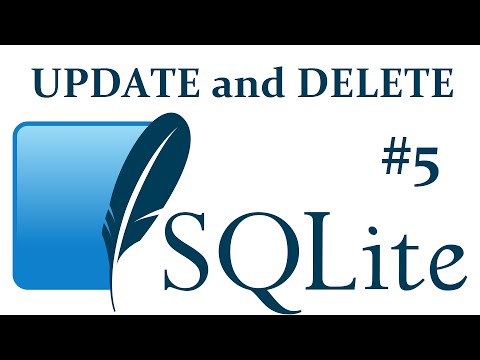

In [50]:
from IPython.display import YouTubeVideo
YouTubeVideo('AtBZC9F-MjI')

## 5.1 Existing code

In [51]:
import sqlite3
import time
import datetime
import random

%matplotlib inline
import matplotlib.pyplot as plt
from dateutil import parser
from matplotlib import style
style.use('fivethirtyeight')

# Connect to the database called 'tutorial.db'. If it does't exist, it will be created.
# If it does exist, it will NOT be overwritten or re-created.
conn = sqlite3.connect('tutorial.db')

# Get the cursor which can select/delete/add things and so on.
c = conn.cursor()

def create_table():
    # Create a table called stuffToPlot if it doesn't exist. This table contains the following columns: 
    # unix, datestamp, keyword, value.
    c.execute("CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")
    
def insert_data_entry():
    # The cursor executes an SQL query "INSERT INTO" to insert a tuple of values into the table 'stuffToPlot'.
    c.execute("INSERT INTO stuffToPlot VALUES(1452549219, '2016-01-11 13:53:39', 'Python', 6)")
    
    # Commit the SQL query "INSERT INTO" and save the change in the table. 
    conn.commit()
    
    # Comment out the closure code to improve the efficiency.
    # c.close()
    # conn.close()
    
def insert_dynamic_data_entry():
    unix = int(time.time())
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = "Python"
    value = random.randrange(0, 10)
    
    # While SQLite uses "?" as the placeholder of the input variable, MySQL uses "%s".
    c.execute("INSERT INTO stuffToPlot (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
             (unix, date, keyword, value))
    
    conn.commit()
    
def read_all_from_db():
    # Select all the rows.
    c.execute("SELECT * from stuffToPlot")
    # Fetch all the selected rows.
    data = c.fetchall()
    
    for row in data:
        print(row)
        
def read_some_from_db():
    # Select the rows which satisfy the conditions.
    #c.execute("SELECT * from stuffToPlot WHERE value=3")
    #c.execute("SELECT * from stuffToPlot WHERE value=3 AND keyword='Python'")
    #c.execute("SELECT * from stuffToPlot WHERE unix>=1517301604")
    # Select some columns in the rows.
    c.execute("SELECT keyword, unix from stuffToPlot WHERE unix>=1517301604")
    
    # Fetch the selected rows.
    data = c.fetchall()
    
    for row in data:
        # Print the first element in the row. Note that the order of the elements 
        # in a row can be specified in the SELECT command, and thus may be different 
        # from the order of the columns in the table.
        #print(row[0])
        print(row)

## 5.2 Update and delete

**They are not permanent and can't be undone.**

In [52]:
def update():
    c.execute('SELECT * FROM stuffToPlot')
    print("Before update:")
    # one-liner
    [print(row) for row in c.fetchall()]
    
    c.execute('UPDATE stuffToPlot SET value = 99 WHERE value=1')
    conn.commit()
    
    c.execute('SELECT * FROM stuffToPlot')
    print("After update:")
    [print(row) for row in c.fetchall()]

In [53]:
update()

Before update:
(1517301599.0, '2018-01-30 00:39:59', 'Python', 5.0)
(1517301600.0, '2018-01-30 00:40:00', 'Python', 0.0)
(1517301602.0, '2018-01-30 00:40:02', 'Python', 3.0)
(1517301603.0, '2018-01-30 00:40:03', 'Python', 6.0)
(1517301604.0, '2018-01-30 00:40:04', 'Python', 4.0)
(1517301607.0, '2018-01-30 00:40:07', 'Python', 7.0)
After update:
(1517301599.0, '2018-01-30 00:39:59', 'Python', 5.0)
(1517301600.0, '2018-01-30 00:40:00', 'Python', 0.0)
(1517301602.0, '2018-01-30 00:40:02', 'Python', 3.0)
(1517301603.0, '2018-01-30 00:40:03', 'Python', 6.0)
(1517301604.0, '2018-01-30 00:40:04', 'Python', 4.0)
(1517301607.0, '2018-01-30 00:40:07', 'Python', 7.0)


In [54]:
def delete():
    # (1) SQLite doesn't support DELETE LIMITs.
    # c.execute('DELETE FROM stuffToPlot WHERE value = 99 LIMIT 50')
    # (2) If you omit WHERE in DELETE, DELETE will clear the entire table.
    # c.execute('DELETE FROM stuffToPlot')
    c.execute('DELETE FROM stuffToPlot WHERE value = 99')
    conn.commit()
    
    c.execute('SELECT * FROM stuffToPlot')
    print("After delete:")
    [print(row) for row in c.fetchall()]
    
delete()

After delete:
(1517301599.0, '2018-01-30 00:39:59', 'Python', 5.0)
(1517301600.0, '2018-01-30 00:40:00', 'Python', 0.0)
(1517301602.0, '2018-01-30 00:40:02', 'Python', 3.0)
(1517301603.0, '2018-01-30 00:40:03', 'Python', 6.0)
(1517301604.0, '2018-01-30 00:40:04', 'Python', 4.0)
(1517301607.0, '2018-01-30 00:40:07', 'Python', 7.0)


In [55]:
c.close()
conn.close()